**Random Forest**

Is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

See the difference between Random Forest and Decision Tree.[link text](https://www.upgrad.com/blog/random-forest-vs-decision-tree/)

dataset Description [link text](https://archive-beta.ics.uci.edu/ml/datasets/dry+bean+dataset)

In [118]:
# Import LIBs
import pandas as pd
from io import StringIO

In [119]:
# load the dataset
data = pd.read_excel("Dry_Bean_Dataset.xlsx")
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [120]:
# Print THe columns names
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [121]:
data.shape

(13611, 17)

**Clean The dataset**

In [122]:
# check dublicated rows
data_dublicated = data.duplicated()
data_dublicated.value_counts()

False    13543
True        68
dtype: int64

In [123]:
# Print the duplicated rows
duplicate = data[data.duplicated()]
duplicate

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5548,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5554,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5599,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,63408,1005.966,412.551649,196.337705,2.101235,0.879494,64200,284.136539,0.798791,0.987664,0.787385,0.688730,0.006506,0.000903,0.474348,0.996718,HOROZ
7278,63882,1004.206,411.263403,198.765453,2.069089,0.875452,64663,285.196579,0.754705,0.987922,0.796054,0.693465,0.006438,0.000918,0.480893,0.995010,HOROZ
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7340,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ


In [124]:
# Remove all duplicated rows
data = data.drop_duplicates()
data.shape

(13543, 17)

In [125]:
# save the classes in y1 var
y1=data["Class"].value_counts()
y1

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [126]:
# Assign features to X and label for y
X = data.drop(['Class'],axis=1)
y = data.Class
print('shape of X :' ,X.shape , "\n shape of y :" , y.shape)


shape of X : (13543, 16) 
 shape of y : (13543,)


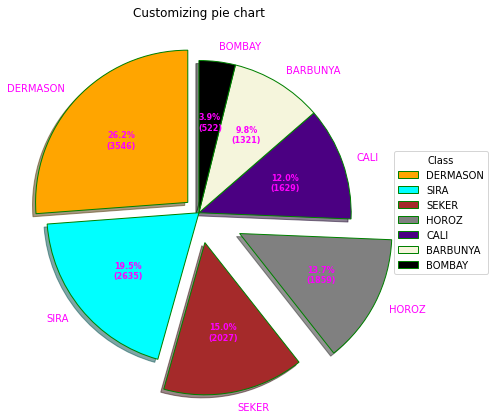

In [127]:
# Visulaze the CLasses
import numpy as np
# Creating dataset
Class = ['DERMASON','SIRA' ,'SEKER' ,  'HOROZ','CALI','BARBUNYA','BOMBAY']
  
data = [23, 17, 35, 29, 12, 41]
  
  
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.0)
  
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige","Black")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(y1, 
                                  autopct = lambda pct: func(pct, y1),
                                  explode = explode, 
                                  labels = Class,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
  
# Adding legend
ax.legend(wedges, Class,
          title ="Class",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
  
# show plot
plt.show()

**Now we have Balanced dataset**

In [128]:
print(X.head(),"\n",X.shape)

    Area  Perimeter  MajorAxisLength  ...  ShapeFactor2  ShapeFactor3  ShapeFactor4
0  28395    610.291       208.178117  ...      0.003147      0.834222      0.998724
1  28734    638.018       200.524796  ...      0.003564      0.909851      0.998430
2  29380    624.110       212.826130  ...      0.003048      0.825871      0.999066
3  30008    645.884       210.557999  ...      0.003215      0.861794      0.994199
4  30140    620.134       201.847882  ...      0.003665      0.941900      0.999166

[5 rows x 16 columns] 
 (13543, 16)


In [130]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder to change classes name to numbers
labelencoder = LabelEncoder()
y['Class_L'] = labelencoder.fit_transform(y)

y.Class_L

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


array([5, 5, 5, ..., 3, 3, 3])

In [131]:
# Split the data int train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.Class_L, test_size=0.3, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

9480 4063 9480 4063


In [132]:
# Random Forest imported 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5,random_state=0)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.9141028796455821


In [135]:
# Draw the Tree of Random Forest
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.estimators_[3]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.estimators_[3]
# Export the image to a dot file
feature_list = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)


In [136]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [137]:
# test the Model
y_predicted = model.predict(X_test)

In [138]:
# Calculate MAE - MSE - RMSE
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 0.22594142259414227
Mean Squared Error: 0.702928870292887
Root Mean Squared Error: 0.8384085342438297


In [139]:
# Calculate the confusion_matrix - precision  -  recall - f1-score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_predicted))
print(classification_report(y_test,y_predicted))
print(accuracy_score(y_test, y_predicted))

[[354   0  28   0   1   5   8]
 [  0 161   0   0   0   0   0]
 [ 23   0 436   0  10   1   3]
 [  1   0   0 989   0  17  58]
 [  5   0   4   7 525   0  12]
 [  4   0   1  18   0 578  17]
 [  9   0   3  79  20  15 671]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       396
           1       1.00      1.00      1.00       161
           2       0.92      0.92      0.92       473
           3       0.90      0.93      0.92      1065
           4       0.94      0.95      0.95       553
           5       0.94      0.94      0.94       618
           6       0.87      0.84      0.86       797

    accuracy                           0.91      4063
   macro avg       0.93      0.92      0.92      4063
weighted avg       0.91      0.91      0.91      4063

0.9141028796455821


Text(69.0, 0.5, 'Truth')

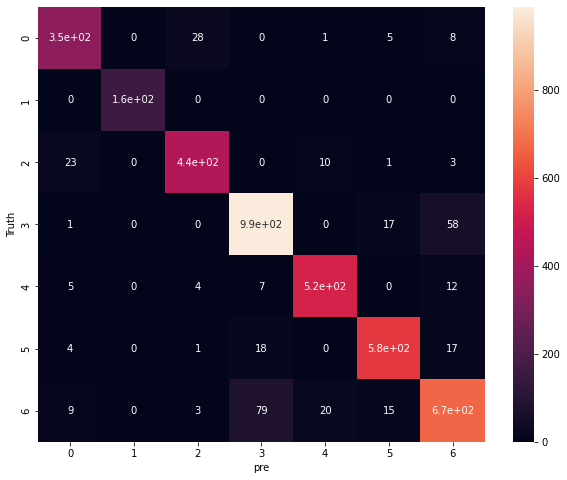

In [140]:
# Visulazie confusion_matrix in plot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True)
plt.xlabel("pre")
plt.ylabel("Truth")